In [632]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
%matplotlib inline

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
light_palette=sns.light_palette("xkcd:white", 8)

In [633]:
# centered matrix
A=[[0.0,1.0],[1.0,2.0],[3.0,3.0]]
A-=np.mean(A,axis=0)
X=np.matrix(A)


# SVD

### numpy

In [634]:
def svd(X):
  # Data matrix X, X doesn't need to be 0-centered
  n, m = X.shape
  # Compute full SVD
  U, Sigma1, Vh = np.linalg.svd(X, 
      full_matrices=True, # It's not necessary to compute the full matrix of U or V
      compute_uv=True)
  # Transform X with SVD components
  Sigma=np.vstack([np.diag(Sigma1),np.zeros(2)])
  X_svd_U = np.dot(U, Sigma)
  X_svd_V = np.dot(X, Vh.T)
  return X_svd_U,X_svd_V, U, Sigma1, Vh

def plot_matrix(X):
  plt.figure(figsize=(3, 3))
  sns.heatmap(X,annot=True,cbar=False,xticklabels='',yticklabels='',annot_kws={'fontsize':14},square=True,cmap=light_palette,linewidth=2,linecolor='black')
  plt.tight_layout(h_pad=200,w_pad=200)

In [635]:
X_svd_U,X_svd_V, U, Sigma1, Vh=svd(X)

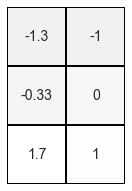

In [636]:
plot_matrix(X)

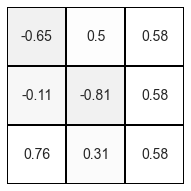

In [637]:
plot_matrix(U)

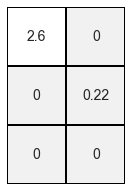

In [638]:

plot_matrix( np.vstack([np.diag(Sigma1),np.zeros(2)]))

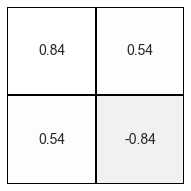

In [639]:
plot_matrix(Vh)

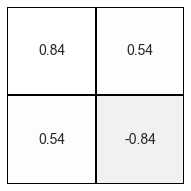

In [640]:
plot_matrix(Vh.T)

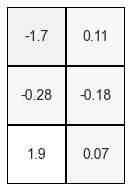

In [641]:
plot_matrix(svd(X)[0])

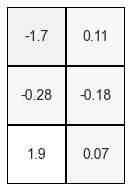

In [642]:
plot_matrix(svd(X)[1])

### svd in sklearn

singular values= [2.57 0.22]
eigen values=[6.62 0.05]


c:\Users\Rayan\.conda\envs\pgds_program\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\Rayan\.conda\envs\pgds_program\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


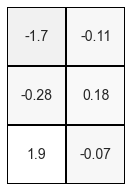

In [643]:
# define transform
svd = TruncatedSVD()
# prepare transform on dataset
svd.fit(X)
# apply transform to dataset
singula_values = svd.singular_values_
print(f'singular values= {singula_values}')
print(f'eigen values={np.power(singula_values,2)}')
transformed = svd.transform(X)
plot_matrix(transformed)

# PCA

### numpy

In [644]:
Cov=np.matmul(X.T, X)#/X.shape[0]# if we devided by X.shape[0], the eigen values will change.
#Get the eigenvectors from covariance matrix
lamda = np.linalg.eig(Cov)[0]
V = np.linalg.eig(Cov)[1]
print(f"Manual PCA eigen values:{lamda}")
print(f"Manual singular values:{np.sqrt(lamda)}")
#perform the projection
print("Manual PCA output:")
print(np.matmul(X, V))
#plot_matrix(np.matmul(X, V))
#plot_matrix(np.matrix(lamda))


Manual PCA eigen values:[6.62 0.05]
Manual singular values:[2.57 0.22]
Manual PCA output:
[[-1.66 -0.11]
 [-0.28  0.18]
 [ 1.94 -0.07]]


### Sklearn


In [645]:

pca = PCA(svd_solver='auto')
pca.fit(A)
print(f'variance:{pca.explained_variance_}')
print(f'singualr values{pca.singular_values_}')
print(f'eigenvalues:{np.power(pca.singular_values_,2)}')
print("Sklearn PCA output:")
print(pca.transform(A))

variance:[3.31 0.03]
singualr values[2.57 0.22]
eigenvalues:[6.62 0.05]
Sklearn PCA output:
[[-1.66 -0.11]
 [-0.28  0.18]
 [ 1.94 -0.07]]
